# google colabを使ってお手軽に機械学習を試すの巻

google colabを使って機械学習が簡単にできるらしい。  
tensorflowとtensorflow--hubがあるので、これで行ってみよう。

tensorflow-hubの日本語テキスト解析器を利用。  

使い方は下記サイトのコードを参考に。  
https://tjo.hatenablog.com/entry/2018/06/26/220234

In [0]:
# ここに好きな言葉を入れる
# 注意: 単語ごとに半角空白で区切る、句読点はつけない、半角英数は使わない(全角にする)
# 例: input = ["ネコ", "猫 と 犬"]
input = [
    # まどマギの各話タイトル(特に意味はない)
    "夢 の 中 で 逢っ た よう な",
    "それ は とっても 嬉しい な って",
    "もう 何 も 恐く ない",
    "奇跡 も 魔法 も ある んだ よ",
    "後悔 なんて ある わけ ない",
    "こんな の 絶対 おかしい よ",
    "本当 の 気持ち と 向き合え ます か",
    "あたし って ほんと バカ",
    "そんな の あたし が 許さ ない",
    "もう 誰 に も 頼ら ない",
    "最後 に 残っ た 道しるべ",
    "わたし の 最高 の 友達",
]

In [19]:
import tensorflow as tf
import tensorflow_hub as hub

# 学習済み日本語テキスト解析器を読み込み
embed = hub.Module("https://tfhub.dev/google/nnlm-ja-dim128/1")

# 入力文書を投入
embeddings = embed(input)

# tensorflowを使って入力した言葉を128次元の特徴量に変換
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  feature_vectors = sess.run(embeddings) # resultに変換済み特徴量が格納される 
  #print(feature_vectors) # デバッグ用

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


特徴量が取れるので、せっかくなので図式化したい。  
t-SNEで次元削減をして2次元グラフとして表示してみる。  

[参考]  
scikit-learnでt-SNE散布図を描いてみる  
http://inaz2.hatenablog.com/entry/2017/01/24/211331  

Colaboratoryでmatplotlibの日本語表示  
https://qiita.com/unvavo/items/a907cb927bdadc1d8d0c

そのままだとmatplotlibが日本語フォント表示できないため、グラフの日本語が豆腐になってしまう。  
下記のコマンドを実行して、フォントのインストールとmatplotlibのフォント情報を削除しておく。  
※1回実行すればOKなので、テキストとして記載しておく。

```
!apt-get -y install fonts-ipafont-gothic
rm /root/.cache/matplotlib/fontList.json
```

夢 の 中 で 逢っ た よう な -194.78523 19.22862
それ は とっても 嬉しい な って 24.656153 90.923996
もう 何 も 恐く ない 13.656816 -79.99933
奇跡 も 魔法 も ある んだ よ 233.09921 -8.304731
後悔 なんて ある わけ ない -124.24051 -120.59646
こんな の 絶対 おかしい よ 104.620384 -0.037353564
本当 の 気持ち と 向き合え ます か 5.39109 -208.47731
あたし って ほんと バカ -66.30727 10.961831
そんな の あたし が 許さ ない -106.900345 148.85947
もう 誰 に も 頼ら ない 162.55371 131.51947
最後 に 残っ た 道しるべ 145.21521 -137.93353
わたし の 最高 の 友達 32.924454 219.40211


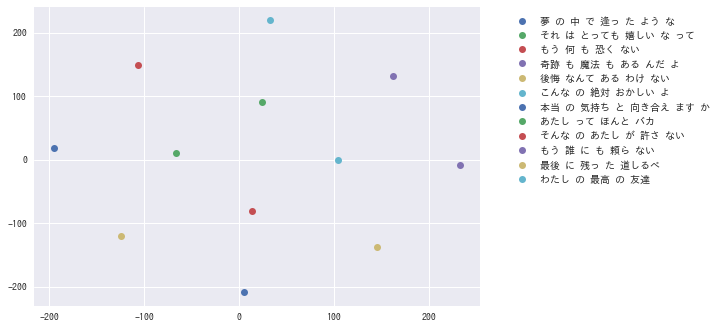

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 図式化のため、128次元を2次元に削減
reduced_vectors = TSNE(n_components=2, random_state=0).fit_transform(feature_vectors)

# matplotlibで日本語を表示するためのフォント設定
import seaborn as sns
sns.set(font='IPAGothic')

# グラフの表示(値の確認も一緒に)
for vector, data in zip(reduced_vectors,input):
  print(data, vector[0], vector[1]) # 指数表記を避ける(もっといいやり方がありそうorz)
  plt.plot(vector[0], vector[1], "o", label=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # 凡例を枠外に表示